# Group information

Names and RA's:

- Vinicius Forato Coracin 231528
- Guilherme Webster Chamoun 257111

# **Machine Learning MC886/MO444 - Task \#2**: Model Selection for classification


### Objective:

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task.

## Airline Passenger Satisfaction

**Context**

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

**Content**

| Column | Description |
|---|---|
| Gender | Gender of the passengers (Female, Male) |
| Customer Type | The customer type (Loyal customer, disloyal customer) |
| Age | The actual age of the passengers |
| Type of Travel | Purpose of the flight of the passengers (Personal Travel, Business Travel) |
| Class | Travel class in the plane of the passengers (Business, Eco, Eco Plus) |
| Flight Distance | The flight distance of this journey |
| Inflight wifi service | Satisfaction level of the inflight wifi service (0:Not Applicable;1-5) |
| Departure/Arrival time convenient | Satisfaction level of Departure/Arrival time convenient |
| Ease of Online booking | Satisfaction level of online booking |
| Gate location | Satisfaction level of Gate location |
| Food and drink | Satisfaction level of Food and drink |
| Online boarding | Satisfaction level of online boarding |
| Seat comfort | Satisfaction level of Seat comfort |
| Inflight entertainment | Satisfaction level of inflight entertainment |
| On-board service | Satisfaction level of On-board service |
| Leg room service | Satisfaction level of Leg room service |
| Baggage handling | Satisfaction level of baggage handling |
| Check-in service | Satisfaction level of Check-in service |
| Inflight service | Satisfaction level of inflight service |
| Cleanliness | Satisfaction level of Cleanliness |
| Departure Delay in Minutes | Minutes delayed when departure |
| Arrival Delay in Minutes | Minutes delayed when Arrival |
| Satisfaction | Airline satisfaction level(Satisfaction, neutral or dissatisfaction) |

**Note:** This data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

**How to load the dataset**

Dataset link: [here](https://drive.google.com/drive/folders/1Wagh0CUKWzjssOif6n4b9dpkzq50bamx?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [ ]:
# Link with google drive
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

# Load dataset from google drive
train_path = "gdrive/MyDrive/Colab Notebooks/Lab02/Airline/train.csv"
test_path = "gdrive/MyDrive/Colab Notebooks/Lab02/Airline/test.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 points)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Satisfaction`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with OneHotEncoding, and remember to scale continuous features to be in a similar scale between each other.


In [ ]:
# First, let's check if there are any NaN values
df_train.isna().sum()

# Remove the rows with NaN values. We decided to remove them because there are
# very fews rows (310) with NaN values, compared to the total number of rows (more than 100k)
df_train = df_train.dropna()

In [ ]:
# Does the same for the test set
df_test.isna().sum()
df_test = df_test.dropna()

In [ ]:
# Split x and y sets apart
x_train = df_train.drop('satisfaction', axis=1)
y_train = df_train['satisfaction']
x_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']

In [ ]:
# Let's drop Unnamed:0 and id columns
x_train = x_train.drop(['Unnamed: 0', 'id'], axis=1)
x_test = x_test.drop(['Unnamed: 0', 'id'], axis=1)

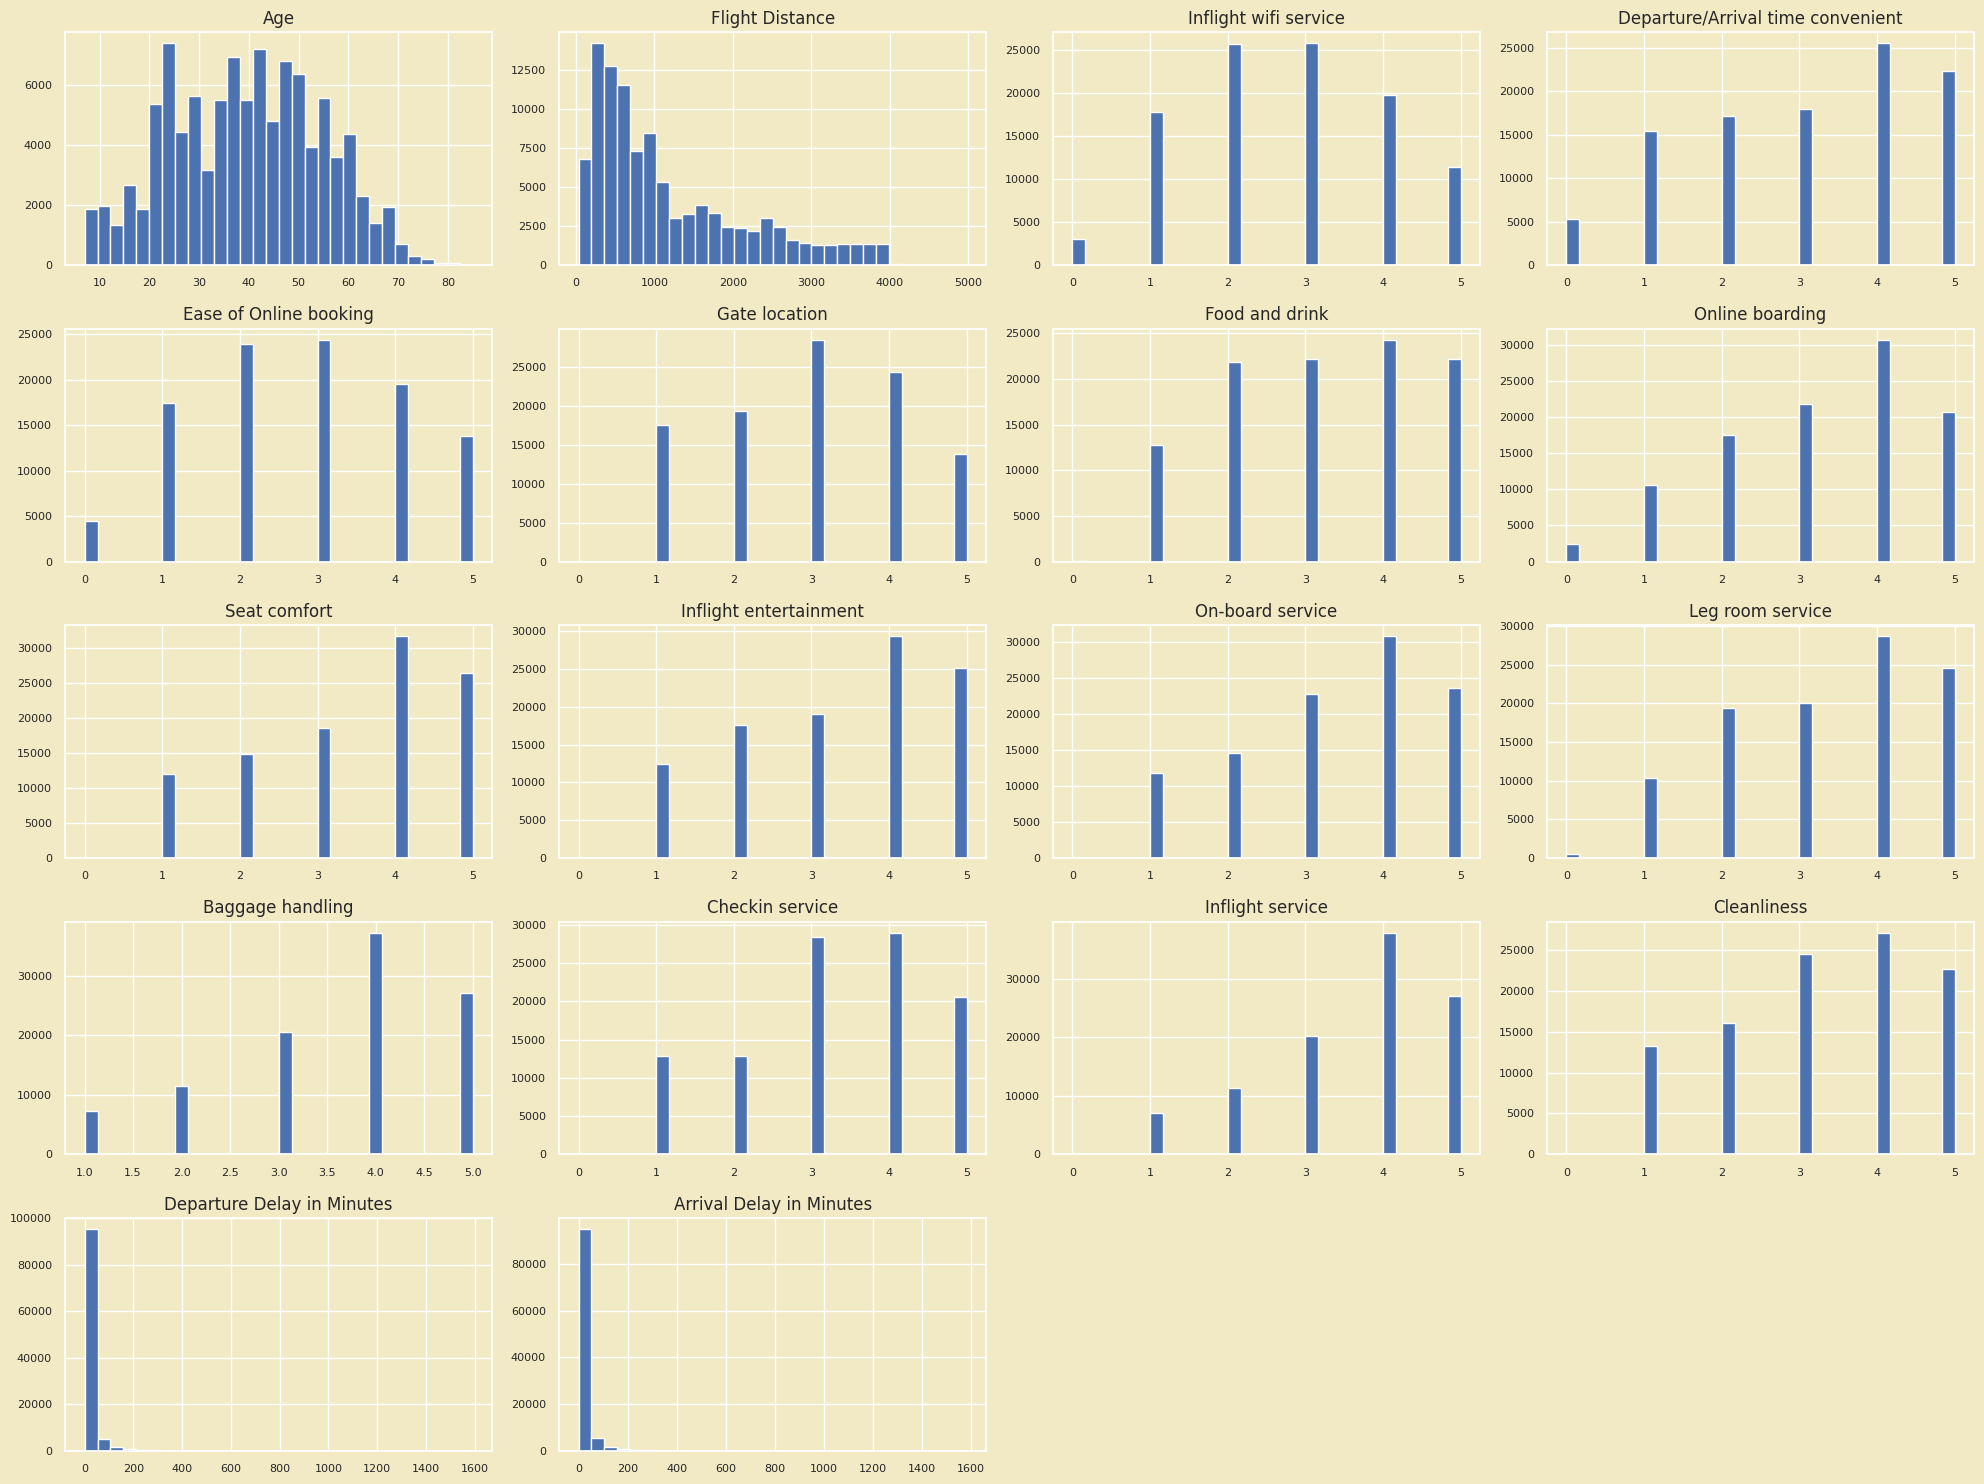

In [ ]:
# Plot graphs of feature distribution
import seaborn as sns
import matplotlib.pyplot as plt

# We can only plot the graphs of the numerical features
numerical_cols = x_train[x_train.columns[(x_train.dtypes == 'float64') | (x_train.dtypes == 'int64')]]

sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# One hot encoding on the columns Gender, Customer Type, Type of Travel and Class
x_train = pd.get_dummies(x_train, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
x_test = pd.get_dummies(x_test, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [ ]:
# Normalize the features Age, Flight Distance, Departure Delay in Minutes and Arrival Delay in Minutes
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = scaler.fit_transform(x_train[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])
x_test[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = scaler.transform(x_test[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])

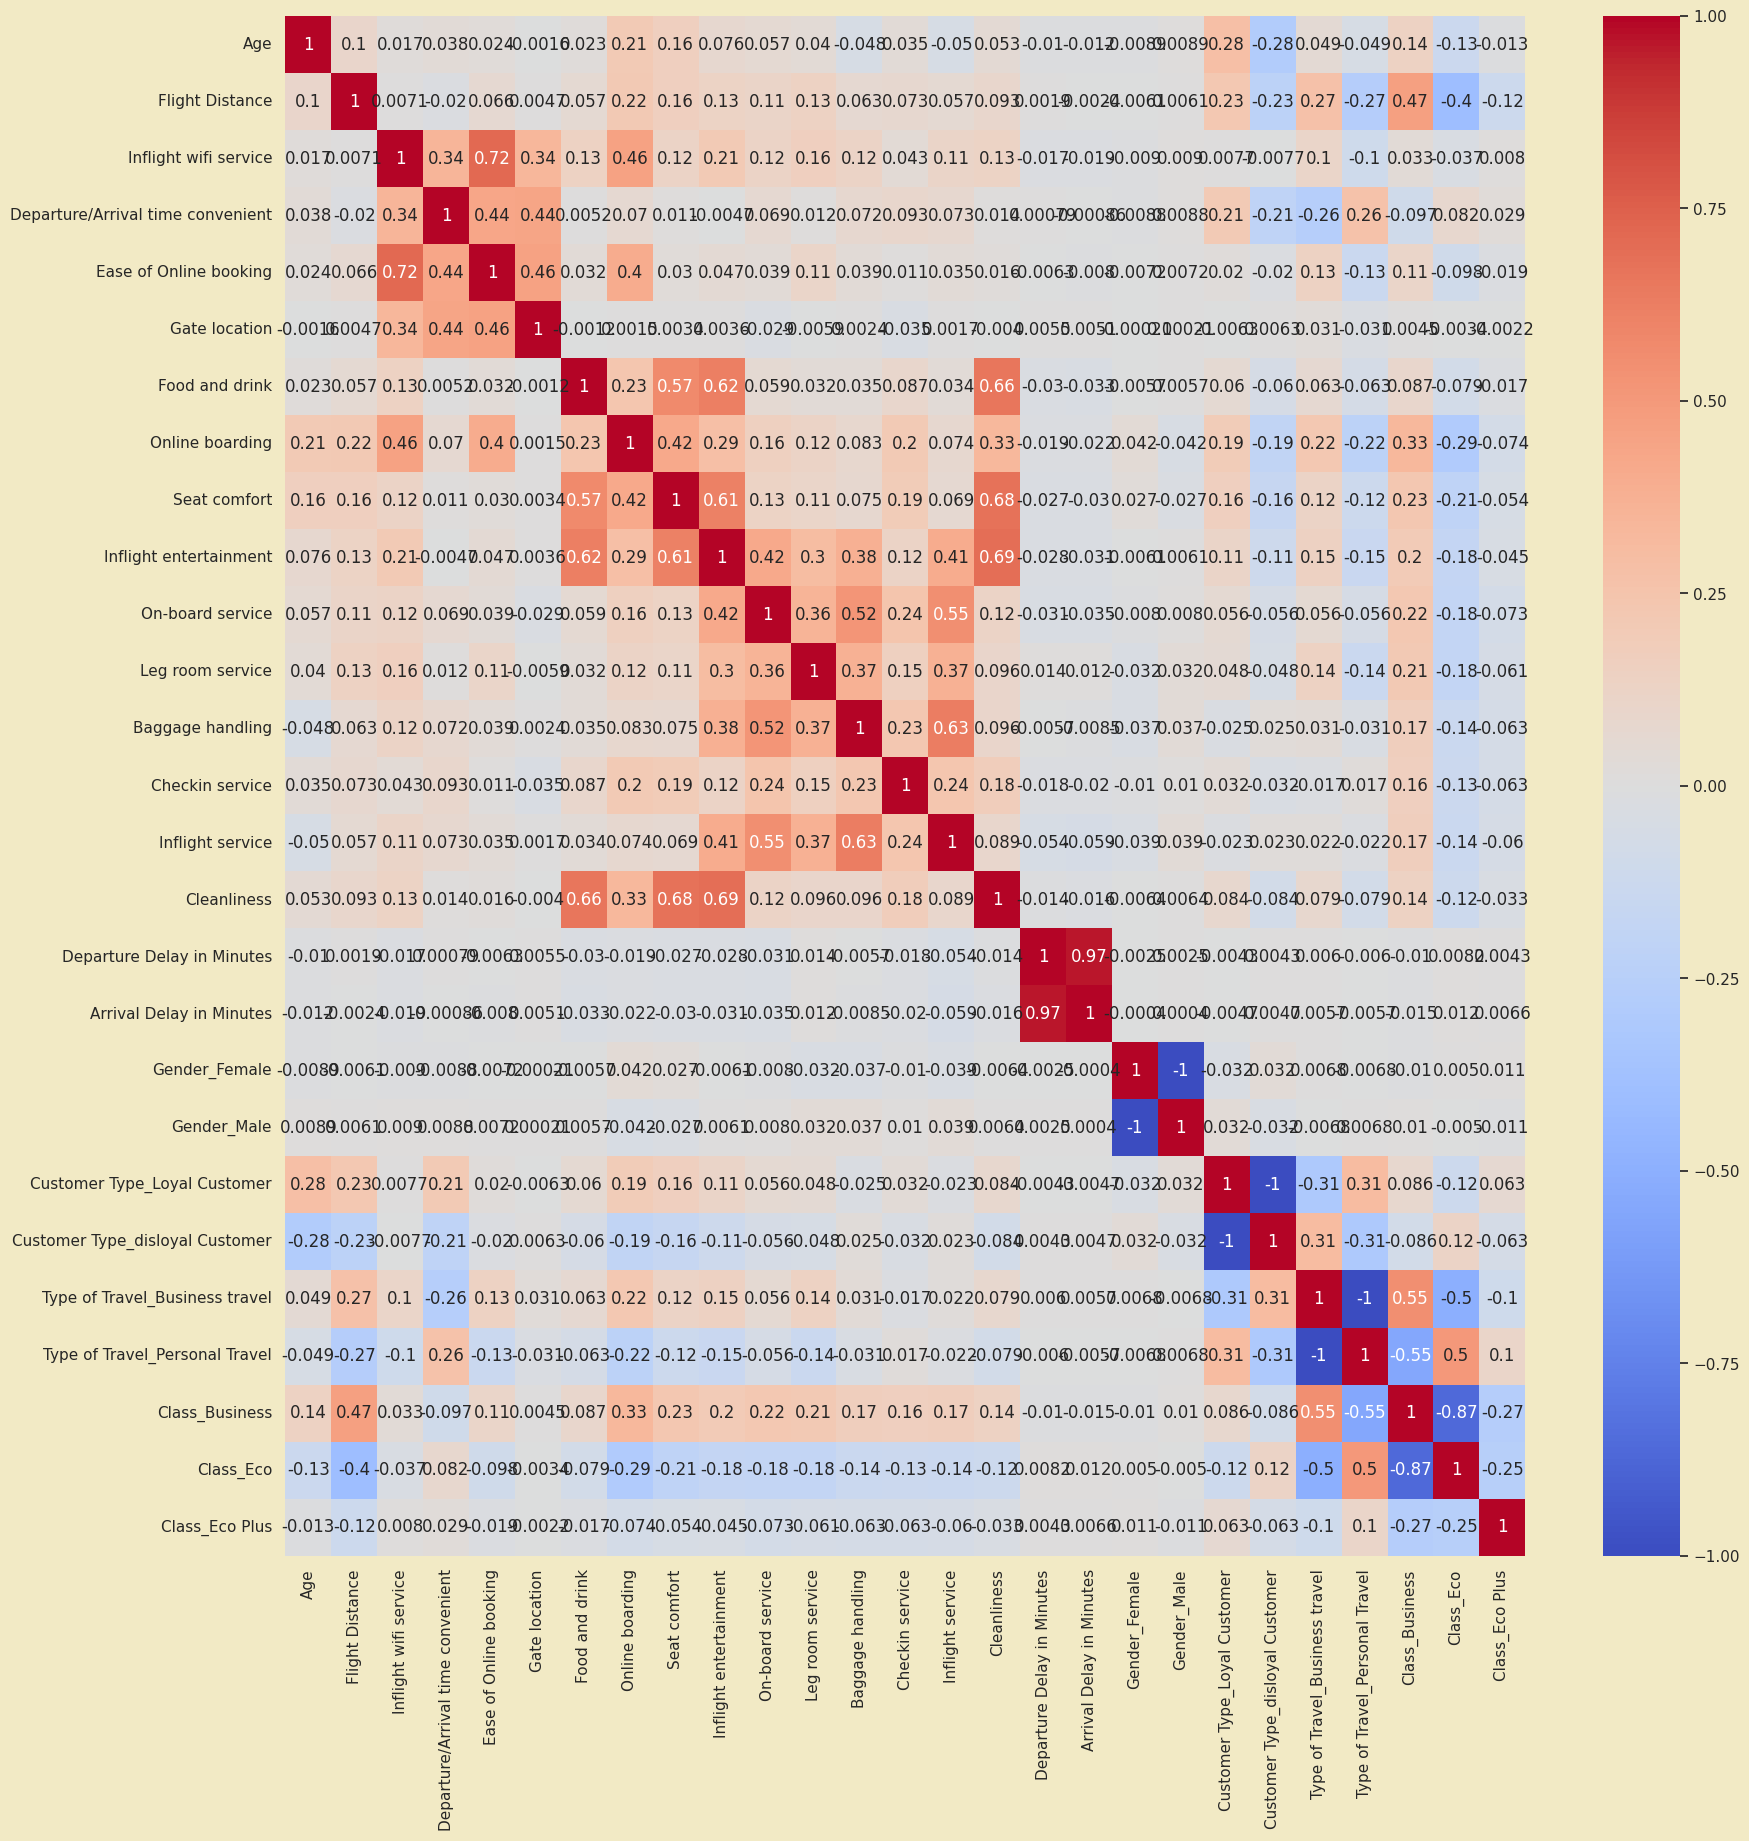

In [ ]:
# Check mutual information

corr_matrix = x_train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### **Metric selection** (0.5 point)

As we're working with unbalanced data, the accuracy metric is not a good indicator of performance. Choose a metric and explain why that metric is a good fit for the online shopping intention problem. You don't need to implement the metric, only discuss it.

*Tip: Some common metrics are [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)*.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# We choose balanced accuracy because it's a metric that handles well unbalanced data in cases where
# none of the classes should weight more than the other. That is, the loss of a false positive and of
# a false negative should be the same, what makes balanced accuracy more suitable for this problem that
# other metrics, like precision, recall or AUC.

### **Feature selection** (2 points)

As seen in class, there are different ways to select which features to use in a machine learning model.

You should implement the "Forward stepwise selection" technique to find the best `p` features to be used in this task according to that method.

Use the [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and the **K-fold cross-validation** as optimality criterion. You can use the Scikit-learn library, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model. The metric used in K-fold should be the one chosen in the previous section!

Remember to save a new dataframe only with the selected features for the next steps! Also, use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data on the final part of the whole task.

In [ ]:
# Select the more relevant features

import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer

num_features = x_train.shape[1]
selected_features = []
remaining_features = list(x_train.columns)
best_score = -np.inf
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for _ in range(1, num_features):
    scores = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        x_train_subset = x_train[current_features]

        # Impute missings values using the mean strategy
        imputer = SimpleImputer(strategy='mean')
        x_train_subset = imputer.fit_transform(x_train_subset)

        # Defines the model and the selected metric
        model = LogisticRegression(solver="liblinear", random_state=42)
        metric = make_scorer(balanced_accuracy_score)

        # Cross-validation score
        cv_scores = cross_val_score(model, x_train_subset, y_train, cv=kf, scoring=metric)
        scores.append((np.mean(cv_scores), feature))

    # Chooose te feature with best score
    best_new_score, best_feature = max(scores, key=lambda x: x[0])

    if best_new_score > best_score:
        best_score = best_new_score
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        print(f"Selected feature: {best_feature}, Score; {best_new_score}")
    else:
        break

Selected feature: Online boarding, Score; 0.7922691814261087
Selected feature: Type of Travel_Business travel, Score; 0.8353606411722703
Selected feature: Inflight wifi service, Score; 0.8420958010666011


In [ ]:
# Create new dataframes with the selected features

x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

In [ ]:
# Save the new dataframes on drive

x_train_selected.to_csv('gdrive/MyDrive/Colab Notebooks/Lab02/NewDatasets/x_train_selected.csv', index=False)
x_test_selected.to_csv('gdrive/MyDrive/Colab Notebooks/Lab02/NewDatasets/x_test_selected.csv', index=False)

In [ ]:
# Load the new dataframes

x_train_selected = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Lab02/NewDatasets/x_train_selected.csv')
x_test_selected = pd.read_csv('gdrive/MyDrive/Colab Notebooks/Lab02/NewDatasets/x_test_selected.csv')

### **Model selection** (4 points)

This is the main section of the task. Using the features selected in the previous section, you must use [**Grid search** with K-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the best classification model and its hyperparameters for this task.

Remember to use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data.

You should train and validate the following models:
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html), explore a Decision Tree Classifier, RF and GBM.
- [SVM](https://scikit-learn.org/stable/modules/svm.html)

Explore the documentation above and select which hyperparameters to vary.


Also, you should test the polynomial transformation to find possible nonlinear relations between the features of the dataset. **Do not** use values above "3" for the `degree` of the polynomial transformation, as the number of features increases exponentially.

In short, you should use GridSearchCV (that uses K-fold internally) to get the best hyperparameters for each model, while also testing the polynomial transformation.

*Note: you will need to use the `fit` method more than once to test the different dataset transformations. Choose wisely which hyperparameters to test, as the GridSearch will test all combinations and can take very a long time to finish.*

In [ ]:
# First, let's fit a random classifier to set a base score to be beaten
from sklearn.dummy import DummyClassifier

random_clf = DummyClassifier(strategy="uniform", random_state=42)
random_clf.fit(x_train_selected, y_train)

# Inference
predictions = random_clf.predict(x_test_selected)

# Avaliation of the model
bal_acc = balanced_accuracy_score(y_test, predictions)
print(f"Balanced Accuracy: {bal_acc}")

Balanced Accuracy: 0.4973042331836479


In [ ]:
# Train a logistic regression model

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logistic_params = {
    'model__max_iter': [100],
    'model__C': [0.1, 1, 10],
    'poly__degree': [1, 2, 3],
}
logistic_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LogisticRegression(solver='liblinear'))
])

logistic_reg = GridSearchCV(estimator=logistic_model, param_grid=logistic_params,
                             cv=kf, scoring='balanced_accuracy', n_jobs=-1)

# Trains the model on the training set
logistic_reg.fit(x_train_selected, y_train)

# Results
print(f"Best parameters for Logistic Regression: {logistic_reg.best_params_}")
print(f"Best score: {logistic_reg.best_score_}")

Best parameters for Logistic Regression: {'model__C': 1, 'model__max_iter': 100, 'poly__degree': 3}
Best score: 0.8906009161731141


In [ ]:
# Save the logistic regression model on the disk
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/logreg.pkl"
pickle.dump(logistic_reg, open(pickle_file, 'wb'))

In [ ]:
# Load the saved model
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/logreg.pkl"
logistic_reg = pickle.load(open(pickle_file, 'rb'))

In [ ]:
# Train a decision tree model

from sklearn.tree import DecisionTreeClassifier

tree_params = {
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'poly__degree': [1, 2, 3],
}
tree_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', DecisionTreeClassifier(random_state=42))
])

decision_tree = GridSearchCV(estimator=tree_model, param_grid=tree_params,
                         cv=kf, scoring='balanced_accuracy', n_jobs=-1)

# Trains the model on the training set
decision_tree.fit(x_train_selected, y_train)

# Results
print(f"Best parameters for Decision Tree: {decision_tree.best_params_}")
print(f"Best score: {decision_tree.best_score_}")

Best parameters for Decision Tree: {'model__max_depth': None, 'model__min_samples_split': 2, 'poly__degree': 1}
Best score: 0.8915272609062928


In [ ]:
# Save the decision tree model on the disk
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/dt.pkl"
pickle.dump(decision_tree, open(pickle_file, 'wb'))

In [ ]:
# Load the saved model
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/dt.pkl"
decision_tree = pickle.load(open(pickle_file, 'rb'))

In [ ]:
# Train a random forest model

from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'poly__degree': [1, 2, 3],
}
rf_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', RandomForestClassifier(random_state=42))
])

# Trains the model on the training set
random_forest = GridSearchCV(estimator=rf_model, param_grid=rf_params,
                       cv=kf, scoring='balanced_accuracy', n_jobs=-1)
random_forest.fit(x_train_selected, y_train)

# Results
print(f"Best parameters for Random Forest: {random_forest.best_params_}")
print(f"Best score: {random_forest.best_score_}")

Best parameters for Random Forest: {'model__max_depth': None, 'model__n_estimators': 100, 'poly__degree': 1}
Best score: 0.8915272609062928


In [ ]:
# Save the random forest model on the disk
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/rf.pkl"
pickle.dump(random_forest, open(pickle_file, 'wb'))

In [ ]:
# Load the saved model
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/rf.pkl"
random_forest = pickle.load(open(pickle_file, 'rb'))

In [ ]:
# Train a Gradient Boosting Machine

from sklearn.ensemble import GradientBoostingClassifier

gbm_params = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5],
    'poly__degree': [1, 2, 3],
}
gbm_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Trains the model on the training set
gbm = GridSearchCV(estimator=gbm_model, param_grid=gbm_params,
                        cv=kf, scoring='balanced_accuracy', n_jobs=-1)
gbm.fit(x_train_selected, y_train)

# Results
print(f"Best parameters for GBM: {gbm.best_params_}")
print(f"Best score: {gbm.best_score_}")

Best parameters for GBM: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'poly__degree': 2}
Best score: 0.8915272609062928


In [ ]:
# Save the GBM model on the disk
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/gbm.pkl"
pickle.dump(gbm, open(pickle_file, 'wb'))

In [ ]:
# Load the saved model
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/gbm.pkl"
gbm = pickle.load(open(pickle_file, 'rb'))

In [ ]:
# Train a Support Vector Machine Model

from sklearn.svm import SVC

svm_params = {
    'model__max_iter' : [100],
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto'],
    'poly__degree': [1, 2, 3],
}
svm_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', SVC(probability=True))
])

svm = GridSearchCV(estimator=svm_model, param_grid=svm_params,
                        cv=kf, scoring='balanced_accuracy', n_jobs=-1)

# Trains the model on the training set
svm.fit(x_train_selected, y_train)

# Results
print(f"Best parameters for SVM: {svm.best_params_}")
print(f"Best score: {svm.best_score_}")

Best parameters for SVM: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear', 'model__max_iter': 100, 'poly__degree': 2}
Best score: 0.780944714542897


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Save the SVM model on the disk
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/svm.pkl"
pickle.dump(svm, open(pickle_file, 'wb'))

In [ ]:
# Load the saved model
import pickle

pickle_file = "gdrive/MyDrive/Colab Notebooks/Lab02/Models/svm.pkl"
svm = pickle.load(open(pickle_file, 'rb'))

#### Discussion of key points

- What was the best model according to cross validation?
- The models that use regularization were able to outperform the Logistic Regression? Explain why.


### Threshold testing (1 point)

The three models trained in the previous session can return the probabilities of a sample being of the positive class.
The default threshold used to convert the results to the desired 0 or 1 output is `0.5`.

Use the K-fold cross validation to test different thresholds with the best models trained in the previous section (remember to train the best models with all train data and the best hyperparameters).

*If the model does not output probabilities, look for the `predic_proba` method*.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score

def find_best_threshold(model, x_train, y_train, k=5, thresholds=np.arange(0.1, 1.0, 0.1)):
    y_train_copy = y_train.copy()
    y_train_copy = y_train_copy.map({'neutral or dissatisfied': 0, 'satisfied': 1})
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    results = {threshold: [] for threshold in thresholds}

    # Cross validation loop
    for train_index, val_index in kf.split(x_train):
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_copy_fold, y_val_fold = y_train_copy.iloc[train_index], y_train_copy.iloc[val_index]

        # Probabilities of the positive class
        y_proba = model.predict_proba(x_val_fold)[:, 1]

        # Testing the thresholds
        for threshold in thresholds:
            y_pred_threshold = (y_proba >= threshold).astype(int)
            bal_acc = balanced_accuracy_score(y_val_fold, y_pred_threshold)
            results[threshold].append(bal_acc)

    # Calculates the mean accuracy for each threshold
    mean_results = {threshold: np.mean(acc) for threshold, acc in results.items()}

    # Finds the best threshold
    best_threshold = max(mean_results, key=mean_results.get)

    return best_threshold, mean_results[best_threshold]

In [ ]:
# Logistic regression
best_threshold_logreg, mean_results_logreg = find_best_threshold(logistic_reg, x_train_selected, y_train)
print(f"Best threshold for Logistic Regression: {best_threshold_logreg}, with balanced accuracy of {mean_results_logreg}")

# Decision Tree
best_threshold_tree, mean_results_tree = find_best_threshold(decision_tree, x_train_selected, y_train)
print(f"Best threshold for Decision Tree: {best_threshold_tree}, with balanced accuracy of {mean_results_tree}")

# Random forest
best_threshold_rf, mean_results_rf = find_best_threshold(random_forest, x_train_selected, y_train)
print(f"Best threshold for Random Forest: {best_threshold_rf}, with balanced accuracy of {mean_results_rf}")

# GBM
best_threshold_gbm, mean_results_gbm = find_best_threshold(gbm, x_train_selected, y_train)
print(f"Best threshold for GBM: {best_threshold_gbm}, with balanced accuracy of {mean_results_gbm}")

# SVM
best_threshold_svm, mean_results_svm = find_best_threshold(svm, x_train_selected, y_train)
print(f"Best threshold for SVM: {best_threshold_svm}, with balanced accuracy of {mean_results_svm}")

Best threshold for Logistic Regression: 0.4, with balanced accuracy of 0.891615523921352
Best threshold for Decision Tree: 0.4, with balanced accuracy of 0.8925418686545303
Best threshold for Random Forest: 0.4, with balanced accuracy of 0.8925418686545303
Best threshold for GBM: 0.4, with balanced accuracy of 0.8925418686545303
Best threshold for SVM: 0.8, with balanced accuracy of 0.7808313262125886


### Visualizing/interpreting weights (0.5 point)

As we're dealing with models that apply regularization terms, it's relatively easy to verify those results on the coefficient weights of the trained models.

Use the function below to visualize the weights of the final models.</br>
Also, train the three models again using *all* original features, and use the function below to compare how the weight distribution behaves on each of the models*.

\* *If no features were removed in previous sections, just compare the three models*

In [ ]:
import plotly.express as px

def plot_feature_importances(model, columns):
    '''
    Plot feature importances for models like Decision Trees, Random Forest, and Gradient Boosting.
    "model" should have the "feature_importances_" attribute.
    '''
    if not hasattr(model, 'feature_importances_'):
        print("Invalid model!")
        return

    df_plot = pd.DataFrame(columns=['importance', 'columns'])
    df_plot['columns'] = columns
    df_plot['importance'] = model.feature_importances_

    fig = px.bar(df_plot, x='columns', y='importance', color='importance')
    fig.show()

In [ ]:
# Plot the decision tree's weights

tree_features = ['Online boarding', 'Type of Travel_Business travel', 'Inflight wifi service']
plot_feature_importances(decision_tree.best_estimator_.named_steps['model'], tree_features)

In [ ]:
# Plot the random forest's weights

rf_features = ['Online boarding', 'Type of Travel_Business travel', 'Inflight wifi service']
plot_feature_importances(random_forest.best_estimator_.named_steps['model'], rf_features)

In [ ]:
# Plot the GBM's weights

gbm_features = ['Online boarding', 'Type of Travel_Business travel', 'Inflight wifi service',
                'Online boarding^2', 'Type of Travel_Business travel^2', 'Inflight wifi service^2',
                'Online boarding Type of Travel_Business travel', 'Online boarding Inflight wifi service',
                'Type of Travel_Business travel Inflight wifi service']
plot_feature_importances(gbm.best_estimator_.named_steps['model'], gbm_features)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest
all_features_rf = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2, random_state=42)
all_features_rf.fit(x_train, y_train)

# Gradient Boosting
all_features_gbm = GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=100, random_state=42)
all_features_gbm.fit(x_train, y_train)

In [ ]:
# Ploting the weights for the all featured models
all_features = ['Age', 'Flight Distance', 'Inflight wifi service',
                'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Inflight service',
                'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
                'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
                'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
                'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
                'Class_Eco Plus']

# Decision Tree
all_features_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
all_features_dt.fit(x_train, y_train)

plot_feature_importances(all_features_dt, all_features)

In [ ]:
# Random forest
all_features_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
all_features_dt.fit(x_train, y_train)

plot_feature_importances(all_features_dt, all_features)

In [ ]:
# GBM

all_features_gbm = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
all_features_gbm.fit(x_train, y_train)

plot_feature_importances(all_features_gbm, all_features)

### Explainability Tools (+0.5 points)

Use explainability tools, like [SHAP](https://shap.readthedocs.io/en/latest/), explain how it works and apply to DT or Kernel SVM.

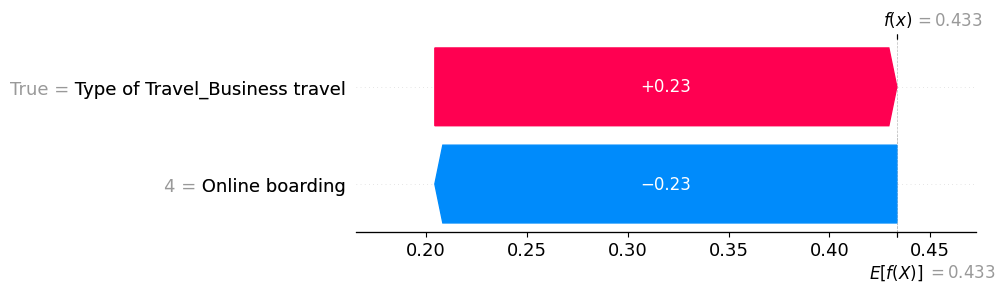

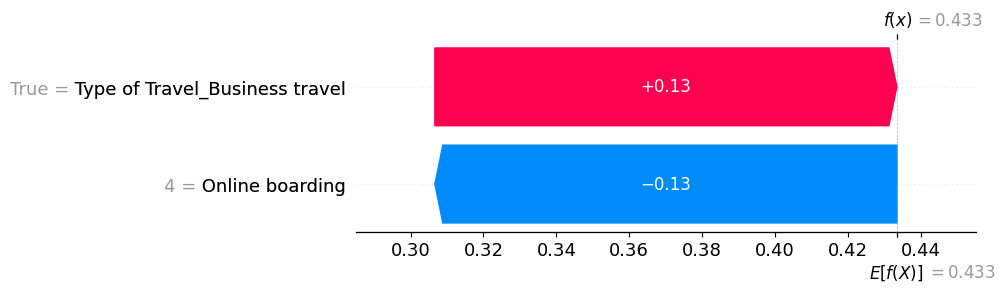

In [ ]:
import shap
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Casts non-numerical columns to numerical columns
x_test_copy = x_test_selected.copy()
x_test_copy = x_test_copy.apply(pd.to_numeric, errors='coerce')

# Trains the decision tree model
tree_model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
tree_model.fit(x_train_selected, y_train)

# SHAP
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(x_test_copy)

# First instance of satisfied class
shap.plots.waterfall(shap.Explanation(values=shap_values[1][0],
                                       base_values=explainer.expected_value[1],
                                       data=x_test_copy.iloc[0]))

# Second instance of satisfied class
shap.plots.waterfall(shap.Explanation(values=shap_values[1][1],
                                       base_values=explainer.expected_value[1],
                                       data=x_test_copy.iloc[0]))

In [ ]:
from sklearn.svm import SVC
import pandas as pd

# Casts non-numerical columns to numerical columns
x_test_copy = x_test_selected.copy()
x_test_copy = x_test_copy.apply(pd.to_numeric, errors='coerce')

# Trains the SVM model (note that we use probability=True to get class probabilities)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(x_train_selected, y_train)

SVC(kernel='linear', probability=True, random_state=42)

  0%|          | 0/25893 [00:00<?, ?it/s]

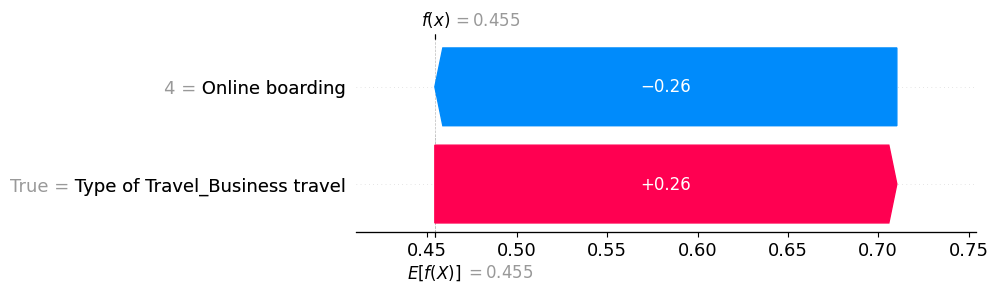

In [ ]:
import shap

K = 1
background_data = shap.kmeans(x_train_selected, K)

# SHAP
explainer = shap.KernelExplainer(svm_model.predict_proba, background_data)
shap_values = explainer.shap_values(x_test_copy)

# First instance of the positive class
shap.plots.waterfall(shap.Explanation(values=shap_values[1][0],
                                       base_values=explainer.expected_value[1],
                                       data=x_test_copy.iloc[0]))

#### Discussion of key points

- What conclusions can you have when looking at the different graphs?


When looking to the decision tree, random forest and GBM graphs, we see that, indeed, the most relevant features to our models are 'Online Boarding', 'Inflight Wifi Service' and 'Type of Travel_Business Travel', the same features selected before fitting the models. The SHAP graphs indicates, for particular instances of data, which features contributes more and how they contributes for the prediction. In the decision tree first plot, we see that 'Type of Travel_Business Travel' (red horizontal bar) contributes to predict the client as the satisfied class, while 'Online Boarding' (blue horizontal bar)contributes to predict him as 'Neutral or unsatisfied'. In the SVM plot can take the same conclusions.

### Testing (0.5 point)

Finally, choose your **Best** model in validation, test it and plot the normalized confusion matrix.

In [ ]:
# Best model: Random forest with 0.4 threshold

best_model = random_forest
threshold = 0.4

# Applies the threshold
y_test_copy = y_test.copy()
y_test_copy = y_test_copy.map({'neutral or dissatisfied': 0, 'satisfied': 1})
y_proba_test = best_model.predict_proba(x_test_selected)[:, 1]
predictions = (y_proba_test >= 0.4).astype(int)

# Inference
bal_acc = balanced_accuracy_score(y_test_copy, predictions)
print(f'Balanced Accuracy: {bal_acc}')

Balanced Accuracy: 0.8918011774159789


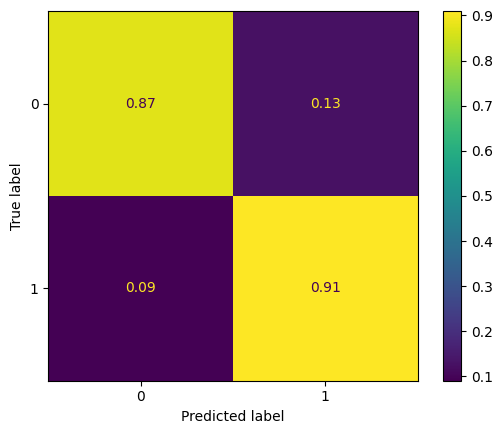

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test_copy, predictions, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix)
display.plot()
plt.show()

## Deadline

Tuesday, October 22, 11:59 pm.

## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.